In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
df = pd.read_csv("clean_tweet_dataset.csv", lineterminator="\n")
df

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
0,That just seriously ruined my night..,seriously ruined night,163,139,1560,1,25985,0,0,0,0,0,0
1,@JessleaC I no they are so funny ..! I love yo...,jessleac funny love pictures take really good ...,113,197,1072,1,2142,0,0,0,1,0,0
2,@honkwas might drive so we could go subway or ...,honkwas might drive could go subway mcdonalds ...,168,382,1732,1,3493,0,0,0,1,0,0
3,That @brad_frost post is bourne out by my expe...,bradfrost post bourne experience current proje...,285,596,5765,45,8670,0,0,0,1,0,0
4,why tf do i keep waking up every 2 hours -.-,tf keep waking every hours,631,353,1589,2,12285,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007996,I just reached level 78 in The Tribez! Join in...,reached level tribez join try overtake ipad i...,2,6,0,0,13562,0,0,3,0,1,1
1007997,Ima smash on site when I get that bitch,ima smash site get bitch,477,588,7048,0,18346,0,0,0,0,0,0
1007998,RT @NiallOfficial: Pukin on fans hahahaha! Whe...,rt niallofficial pukin fans hahahaha come,663,476,9079,4,36930,40219,0,0,1,0,0
1007999,we should of had Monday off,monday,297,1436,5815,0,5308,0,0,0,0,0,0


# Data Visualization

## Wordcloud

In [3]:
# Spam df
df_spam = df[df["label"]==1]
df_spam

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
10,My 2nd pair of ghds are on there way out😒🙆,nd pair ghds way,280,160,2139,0,17647,0,0,0,0,0,1
17,"I've collected 12,293 gold coins! http://t.co/...",ive collected gold coins android androidgames...,8,16,0,0,13134,0,0,3,0,1,1
23,"I've collected 3,550 gold coins! http://t.co/w...",ive collected gold coins ipad ipadgames gamei...,23,56,30,0,2046,0,0,3,0,1,1
30,"I've collected 100,224 gold coins! http://t.co...",ive collected gold coins android androidgames...,0,4,1,0,14373,0,0,3,0,1,1
33,Done :) cheonma chingu RT@yurikeELFSJ: @TyaMei...,done cheonma chingu rtyurikeelfsj tyameimei fo...,460,541,358,0,5242,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007982,RT @MapleLeafs: Retweet this Tweet and ur ente...,rt mapleleafs retweet tweet ur entered win p...,108,213,444,2,8413,12268,0,3,1,0,1
1007984,You're on a journey to restore balance in your...,youre journey restore balance world today libra,33,72,6,0,2342,0,0,0,0,1,1
1007986,I've collected 400 gold coins! http://t.co/lqU...,ive collected gold coins android androidgames...,75,389,91,0,2400,0,0,3,0,1,1
1007989,"I've collected 93,306 gold coins! http://t.co/...",ive collected gold coins ipad ipadgames gamei...,0,0,0,0,64922,0,0,3,0,1,1


In [4]:
# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


def plt_wordcloud(df, col_name):
    #words cloud of most comman words 
    pos_mask = np.array(Image.open('src/twitter_mask.png'))
    np.random.seed(321)
    sns.set(rc={'figure.figsize':(16,16)})
    text = ' '.join(str(v) for v in (df[col_name].values.tolist()))

    wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title('WordCloud for Spam Tweets',size=20)
    plt.show()

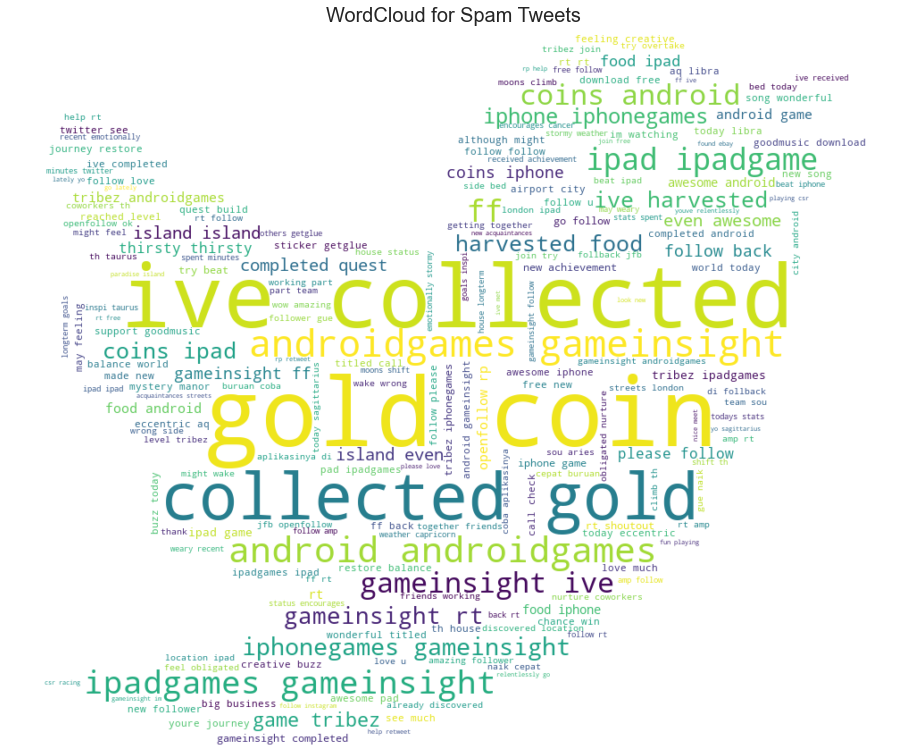

In [5]:
plt_wordcloud(df_spam, "tweet_clean")